## Breakout Session: Monte Carlo Activities

#### 1) Calculating Pi

a) For the example in class of calculing Pi, plot the estimate of Pi as a function of number of samples. 

In [86]:
import matplotlib.pylab as plt
import numpy as np

def circle(x):
    return np.sqrt(1 - x**2)

n_inside, n_outside, n = 0, 0, 100000

def solve(n):
    x = np.random.random(n) * 2 - 1
    y = np.random.random(n) * 2 - 1
    
    n_inside = np.sum(circle(x) > abs(y))
    n_outside =np.sum(circle(x) < abs(y))
    
    return n_inside, n_outside
n_inside, n_outside = solve(n)
print(n_inside)
print(n_outside)

78494
21506


In [87]:
print(len(x[np.where(circle(x) > abs(y))]))

78422


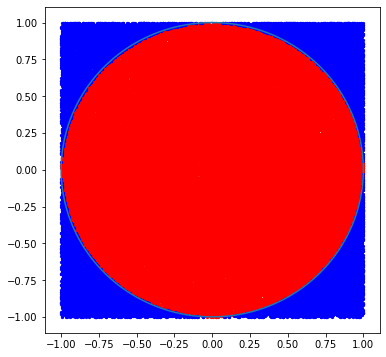

In [88]:
t = np.linspace(0, 2 * np.pi, 1000)

fig = plt.figure(figsize=(6,6))
X = np.sin(t)
Y = np.cos(t)

plt.plot(X, Y)
plt.scatter(x[np.where(circle(x) > abs(y))], y[np.where(circle(x) > abs(y))], s = 5, color = 'r')
plt.scatter(x[np.where(circle(x) < abs(y))], y[np.where(circle(x) < abs(y))], s = 5, color = 'b')

In [89]:
print(n_inside/n, np.pi/4)

0.78494 0.7853981633974483


b) Run this many times; what is the rough scaling relation between fractional error and number of samples?

In [81]:
n_list = np.logspace(3,8,6,base=10)
n_list = n_list.astype(int)
distribution_list = [solve(i) for i in n_list]

In [82]:
partition_list = [distribution_list[n][0] / n_list[n] for n,_ in enumerate(n_list)]

In [83]:
precision_list = [abs(partition_list[n] - np.pi/4) / np.pi for n,_ in enumerate(partition_list)]

[0.0010816690042756761, 0.00079635932420869414, 0.00028388040745279104, 9.7350814149062167e-05, 1.0293060277818786e-05, 1.573532279121971e-06]


Text(0, 0.5, 'deviation')

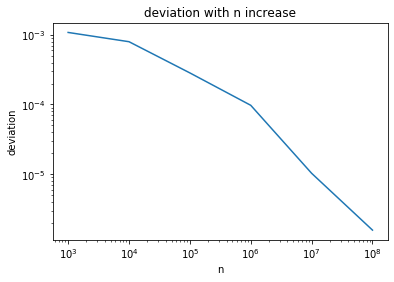

In [84]:
print(precision_list)
plt.title('deviation with n increase')
plt.loglog(n_list, precision_list)
plt.xlabel('n')
plt.ylabel('deviation')

#### 2) Capitalist Coin Games

We play a game where we both start off by flipping fair coins (50/50). If only one person gets heads (i.e. TH, or HT) they are declared the "winner" and get a point. In addition, they get to flip a weighted which will come up heads 75% of the time until they loose, at which point they need to go back to the fair coin and their opponent gets the weighted coin.

We play a total of ten coin flips.

a) Make a simulation to run through each coin flip in series and assign scores to each player.

In [17]:
%pylab inline
#initalizing scores
p1_score, p2_score = 0, 0           

situation = 0 
result_list = []
turns = np.arange(0, 50, 1)

for i,_ in enumerate(turns): #each round
    #SOMETHING!
    p1_filp = np.random.random()
    p2_filp = np.random.random()
    print(p1_filp, p2_filp)
    if(situation == 0):
        if(p1_filp > 0.5 and 0.5 > p2_filp):
            p1_score += 1
            situation = 1
            result_list.append(1)
        elif(p1_filp < 0.5 and 0.5 < p2_filp):
            p2_score += 1
            situation = -1
            result_list.append(-1)
        else:
            result_list.append(0)
    elif(situation == 1):
        if(p1_filp > 0.25 and 0.5 > p2_filp):
            p1_score += 1
            result_list.append(1)
        elif(p1_filp < 0.25 and 0.5 < p2_filp):
            p2_score += 1
            situation = -1
            result_list.append(-1)
        else:
            result_list.append(0)
    elif(situation == -1):
        if(p2_filp > 0.25 and 0.5 > p1_filp):
            p2_score += 1
            result_list.append(-1)
        elif(p2_filp < 0.25 and 0.5 < p1_filp):
            p1_score += 1
            situation = 1
            result_list.append(1)
        else:
            result_list.append(0)

Populating the interactive namespace from numpy and matplotlib
0.7069265178621694 0.20864849005114006
0.8212621619066788 0.6694604094611547
0.3571470060650279 0.6794029842439965
0.1273332980233809 0.8603308036128916
0.27159629311433164 0.7597000854118011
0.8699749720811257 0.29799473388714526
0.9537071089409642 0.5726068980275334
0.9552865079425673 0.8260964009519605
0.7528102547473703 0.2950158243031501
0.012499246389268692 0.8839777549283693
0.8912556991823558 0.7063214294388638
0.7621718390781549 0.849702701259309
0.6030648137873609 0.28039161557459724
0.5609487420925958 0.4367586361398149
0.16673277905515926 0.14085949801096465
0.9003044621796427 0.6163748294318941
0.2328934455898778 0.18521574237402016
0.7571592394054523 0.891612868857906
0.09486537452260813 0.37362928834830145
0.9582363226708916 0.04334092412988355
0.7461484876788892 0.21486445364307538
0.42327932293892534 0.5798298243920832
0.8749687122520885 0.2330718084550073
0.8569811638361756 0.5224249589304212
0.75918698022

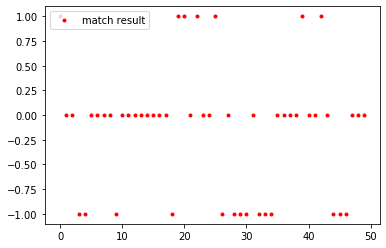

In [18]:
plt.plot(turns, result_list, 'r.', label = 'match result')
plt.legend(loc = 'best')

In [80]:
def simulation():
    ''' assumption : p1 win the first round. '''
    p1_score, p2_score = 1, 0           

    situation = 1 
    result_list = [1]
    turns = np.arange(1, 50, 1)
    
    for i,_ in enumerate(turns): #each round
        p1_filp = np.random.random()
        p2_filp = np.random.random()
        if(situation == 1):
            if(p1_filp > 0.25 and 0.5 > p2_filp):
                p1_score += 1
                result_list.append(1)
            elif(p1_filp < 0.25 and 0.5 < p2_filp):
                p2_score += 1
                situation = -1
                result_list.append(-1)
            else:
                result_list.append(0)
        elif(situation == -1):
            if(p2_filp > 0.25 and 0.5 > p1_filp):
                p2_score += 1
                result_list.append(-1)
            elif(p2_filp < 0.25 and 0.5 < p1_filp):
                p1_score += 1
                situation = 1
                result_list.append(1)
            else:
                result_list.append(0)
    if(p1_score > 7 and p1_score > p2_score): return True, True
    elif(p1_score > 7 and p1_score <= p2_score): return True, False
    elif(p1_score <= 7 and p1_score > p2_score): return False, True
    elif(p1_score <= 7 and p1_score <= p2_score): return False, False

b) If I win the first flip, what is the likelihood I will end the game with greater than 7 points?

(Hint, you will want to run the simulation many times and keep track of who wins each time)

In [93]:
result = np.array([simulation() for n in range(100000)])
result_1 = np.array([result[n][0] for n,_ in enumerate(result)])
result_2 = np.array([result[n][1] for n,_ in enumerate(result)])
print(np.mean(result_1))

0.91753


c) If I win the first flip, what is the likelihood I will win the game?

In [94]:
print(np.mean(result_2))

0.56759
